# AI-Enhanced Momentum Portfolio Analysis - Quantitaive Startegy

This notebook contains the analysis for our AI-enhanced momentum portfolio project.

## Overview
We're building a smart investment tool that combines traditional momentum investing with machine learning to create superior investment strategies.

## Project Phases
1. ✅ Setting Up the Studio (Complete)
2. 🔄 Gathering Our Materials (Data Collection)
3. 📊 Painting the Background (Baseline Model)
4. 🤖 The AI's Masterstroke (ML Model)
5. 📈 The Grand Reveal (Backtesting & Visualization)
6. 📚 Framing the Masterpiece (Documentation & GitHub)


In [2]:
import os
print(f"My current location is: {os.getcwd()}")

My current location is: c:\Users\koush\OneDrive\Desktop\AI_Momentum_Portfolio\notebooks


## 📊 Data Loading and Preparation

### Thought Process:
In this step, we're setting up the foundation of our analysis by loading historical stock data. The key considerations are:

1. **Data Source**: We're using CSV files containing historical stock prices for multiple companies
2. **Data Quality**: We need to handle missing values and ensure data consistency
3. **Data Structure**: We want to create a unified DataFrame with stock tickers as columns and dates as the index
4. **Error Handling**: We need to gracefully handle cases where files might be missing or corrupted

This step is crucial because the quality of our AI model depends entirely on the quality of our input data.

In [4]:
# Import required libraries
import pandas as pd
import os
import glob

# Create a list of all CSV file paths in the data folder
data_folder = '../data'
csv_files = glob.glob(os.path.join(data_folder, '*.csv'))
print(f"Found {len(csv_files)} CSV files in the data folder:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# Initialize an empty pandas DataFrame
combined_data = pd.DataFrame()

# Loop through each CSV file and load the 'Close' column
for file_path in csv_files:
    # Extract the stock ticker from the filename (e.g., 'AAPL_data.csv' -> 'AAPL')
    ticker = os.path.basename(file_path).split('_')[0]
    
    try:
        # Load the CSV file
        stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
        
        # Check if 'Close' column exists
        if 'Close' in stock_data.columns:
            # Add the 'Close' column to our main DataFrame with ticker as column name
            combined_data[ticker] = stock_data['Close']
            print(f"✅ Loaded {ticker} data ({len(stock_data)} rows)")
        else:
            print(f"⚠️  'Close' column not found in {ticker} data")
            
    except Exception as e:
        print(f"❌ Error loading {ticker}: {str(e)}")

# Check for missing values and fill them using forward-fill method
print(f"\nDataFrame shape before cleaning: {combined_data.shape}")
missing_values_before = combined_data.isnull().sum().sum()
print(f"Total missing values before cleaning: {missing_values_before}")

# Fill missing values using forward-fill method
combined_data = combined_data.ffill()

missing_values_after = combined_data.isnull().sum().sum()
print(f"Total missing values after forward-fill: {missing_values_after}")

# If there are still missing values at the beginning, use backward-fill
if missing_values_after > 0:
    combined_data = combined_data.fillna(method='bfill')
    missing_values_final = combined_data.isnull().sum().sum()
    print(f"Total missing values after backward-fill: {missing_values_final}")

print(f"\nFinal DataFrame shape: {combined_data.shape}")
print(f"Date range: {combined_data.index.min()} to {combined_data.index.max()}")

# Display the first 5 rows of the combined DataFrame
print("\n📊 First 5 rows of the combined stock data:")
print("=" * 50)
combined_data.head()

Found 10 CSV files in the data folder:
  - AAPL_data.csv
  - AMZN_data.csv
  - BRK-B_data.csv
  - GOOGL_data.csv
  - JNJ_data.csv
  - JPM_data.csv
  - META_data.csv
  - MSFT_data.csv
  - NVDA_data.csv
  - TSLA_data.csv
✅ Loaded AAPL data (914 rows)
✅ Loaded AMZN data (914 rows)
✅ Loaded BRK-B data (914 rows)
✅ Loaded GOOGL data (914 rows)
✅ Loaded JNJ data (914 rows)
✅ Loaded JPM data (914 rows)
✅ Loaded META data (914 rows)
✅ Loaded MSFT data (914 rows)
✅ Loaded NVDA data (914 rows)
✅ Loaded TSLA data (914 rows)

DataFrame shape before cleaning: (914, 10)
Total missing values before cleaning: 0
Total missing values after forward-fill: 0

Final DataFrame shape: (914, 10)
Date range: 2022-01-03 00:00:00-05:00 to 2025-08-25 00:00:00-04:00

📊 First 5 rows of the combined stock data:


,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2022-01-03 00:00:00-05:00,178.443100,170.404495,300.790009,144.127136,154.672607,146.291046,336.692902,324.504578,30.066141,399.926666
2022-01-04 00:00:00-05:00,176.178421,167.522003,308.529999,143.538635,154.257889,151.836914,334.693848,318.940308,29.236649,383.196655
2022-01-05 00:00:00-05:00,171.492065,164.356995,309.920013,136.953613,155.285782,149.060989,322.401306,306.696869,27.553719,362.706665
2022-01-06 00:00:00-05:00,168.629303,163.253998,313.220001,136.926300,154.753799,150.644638,330.646057,304.273407,28.126669,354.899994
2022-01-07 00:00:00-05:00,168.795990,162.554001,319.779999,136.200150,156.845642,152.137238,329.979736,304.428436,27.197371,342.320007


In [5]:
import pandas as pd
sample_df = pd.read_csv('../data/AAPL_data.csv')
print("The column names are:")
print(sample_df.columns)

The column names are:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Symbol'],
      dtype='object')


## 🔄 Momentum Calculation

### Thought Process:
Momentum is the core concept of our strategy. We calculate momentum as the ratio of current price to price N days ago. This tells us how much a stock has moved over different time periods.

**Why multiple timeframes?**
- **1-month (21 days)**: Short-term momentum, captures recent trends
- **3-month (63 days)**: Medium-term momentum, filters out noise
- **6-month (126 days)**: Longer-term momentum, identifies stronger trends
- **12-month (252 days)**: Long-term momentum, captures major market movements

This multi-timeframe approach helps our AI understand both short-term and long-term price dynamics.

In [6]:
# Calculate 252-day (1 trading year) momentum for each stock
# Momentum formula: current price / price 252 days ago

print("🔄 Calculating 252-day momentum...")

# Create momentum DataFrame by dividing current prices by prices 252 days ago
momentum_12m = combined_data / combined_data.shift(252)

# Remove any rows with NaN values (first 252 days won't have momentum data)
momentum_12m = momentum_12m.dropna()

print(f"✅ Momentum calculation complete!")
print(f"Momentum DataFrame shape: {momentum_12m.shape}")
print(f"Date range: {momentum_12m.index.min()} to {momentum_12m.index.max()}")

# Display the last 5 rows of the momentum DataFrame
print("\n📈 Last 5 rows of 252-day momentum data:")
print("=" * 50)
momentum_12m.tail()

🔄 Calculating 252-day momentum...
✅ Momentum calculation complete!
Momentum DataFrame shape: (662, 10)
Date range: 2023-01-04 00:00:00-05:00 to 2025-08-25 00:00:00-04:00

📈 Last 5 rows of 252-day momentum data:


,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2025-08-19 00:00:00-04:00,1.030763,1.283912,1.100876,1.255713,1.154020,1.404807,1.403333,1.217857,1.430046,1.537826
2025-08-20 00:00:00-04:00,1.004476,1.264035,1.099368,1.229047,1.158586,1.396469,1.422548,1.215572,1.408375,1.498704
2025-08-21 00:00:00-04:00,1.000251,1.245371,1.088731,1.204282,1.157426,1.383222,1.401207,1.205194,1.346425,1.437275
2025-08-22 00:00:00-04:00,1.010198,1.279293,1.090641,1.238715,1.155917,1.411954,1.437880,1.203009,1.399185,1.537811
2025-08-25 00:00:00-04:00,1.008027,1.265560,1.088625,1.263189,1.141194,1.405043,1.412436,1.197826,1.399742,1.552381


## 🔧 Feature Engineering

### Thought Process:
Feature engineering is where we transform raw price data into meaningful signals that our AI can learn from. We're creating:

1. **Momentum Signals**: Multiple timeframes to capture different trend durations
2. **Volatility**: Risk measure using 60-day rolling standard deviation
3. **Target Variable**: Future 1-month return (what we want to predict)

**Key Design Decisions:**
- **Target Horizon**: 21 days (1 month) - balances prediction accuracy with practical trading
- **Volatility Window**: 60 days - captures recent risk without being too noisy
- **Feature Scaling**: Using ratios instead of absolute values for better model performance

In [7]:
# Feature Engineering for AI Model
# Calculate multiple momentum signals and risk metrics

import numpy as np

print("🔧 Starting feature engineering...")

# Calculate daily returns for volatility calculation
daily_returns = combined_data.pct_change()

# Initialize list to store all feature data
feature_data = []

# Loop through each stock to calculate features
for stock in combined_data.columns:
    print(f"Processing {stock}...")
    
    # Get price data for current stock
    prices = combined_data[stock].dropna()
    returns = daily_returns[stock].dropna()
    
    # Calculate momentum signals
    momentum_1m = prices / prices.shift(21)    # 1-month (21 trading days)
    momentum_3m = prices / prices.shift(63)    # 3-month (63 trading days)
    momentum_6m = prices / prices.shift(126)   # 6-month (126 trading days)
    momentum_12m = prices / prices.shift(252)  # 12-month (252 trading days)
    
    # Calculate 60-day rolling volatility
    volatility_60d = returns.rolling(60).std()
    
    # Calculate target variable: future 1-month (21-day) return
    # Target = future price / current price (shifted backward by 21 days)
    target_return = prices.shift(-21) / prices
    
    # Create DataFrame for this stock
    stock_features = pd.DataFrame({
        'Stock': stock,
        'Date': prices.index,
        'Price': prices,
        'Momentum_1M': momentum_1m,
        'Momentum_3M': momentum_3m,
        'Momentum_6M': momentum_6m,
        'Momentum_12M': momentum_12m,
        'Volatility_60D': volatility_60d,
        'Target_1M_Return': target_return
    })
    
    # Set Date as index
    stock_features.set_index('Date', inplace=True)
    
    feature_data.append(stock_features)

# Combine all stocks into one DataFrame
print("🔗 Combining all stock features...")
features_df = pd.concat(feature_data, ignore_index=False)

# Drop all rows with NaN values (AI cannot work with missing data)
print(f"DataFrame shape before dropping NaN: {features_df.shape}")
features_df_clean = features_df.dropna()
print(f"DataFrame shape after dropping NaN: {features_df_clean.shape}")

# Sort by date for better visualization
features_df_clean = features_df_clean.sort_index()

print("✅ Feature engineering complete!")
print(f"Final features DataFrame shape: {features_df_clean.shape}")
print(f"Date range: {features_df_clean.index.min()} to {features_df_clean.index.max()}")
print(f"Number of stocks: {features_df_clean['Stock'].nunique()}")

# Display summary statistics
print("\n📊 Feature Summary Statistics:")
print("=" * 50)
print(features_df_clean.describe())

print("\n📈 First 5 rows of features DataFrame:")
print("=" * 50)
display(features_df_clean.head())

print("\n📉 Last 5 rows of features DataFrame:")
print("=" * 50)
display(features_df_clean.tail())


🔧 Starting feature engineering...
Processing AAPL...
Processing AMZN...
Processing BRK-B...
Processing GOOGL...
Processing JNJ...
Processing JPM...
Processing META...
Processing MSFT...
Processing NVDA...
Processing TSLA...
🔗 Combining all stock features...
DataFrame shape before dropping NaN: (9140, 8)
DataFrame shape after dropping NaN: (6410, 8)
✅ Feature engineering complete!
Final features DataFrame shape: (6410, 8)
Date range: 2023-01-04 00:00:00-05:00 to 2025-07-25 00:00:00-04:00
Number of stocks: 10

📊 Feature Summary Statistics:
             Price  Momentum_1M  Momentum_3M  Momentum_6M  Momentum_12M  \
count  6410.000000  6410.000000  6410.000000  6410.000000   6410.000000   
mean    240.203152     1.035127     1.101655     1.192532      1.369258   
std     136.299997     0.106918     0.197447     0.323510      0.567268   
min      14.252332     0.583188     0.455580     0.450863      0.284152   
25%     147.406872     0.975270     0.984381     1.018266      1.030927   
50%   

,Stock,Price,Momentum_1M,Momentum_3M,Momentum_6M,Momentum_12M,Volatility_60D,Target_1M_Return
Date,,,,,,,,
2023-01-04 00:00:00-05:00,AAPL,124.602715,0.854881,0.866322,0.886828,0.698277,0.025580,1.222697
2023-01-04 00:00:00-05:00,GOOGL,87.554909,0.876941,0.866588,0.768774,0.607484,0.026382,1.189600
2023-01-04 00:00:00-05:00,AMZN,85.139999,0.904494,0.703113,0.744686,0.499635,0.030670,1.214353
2023-01-04 00:00:00-05:00,JNJ,166.685318,1.006988,1.094630,1.023616,1.077665,0.009007,0.913840
2023-01-04 00:00:00-05:00,TSLA,113.639999,0.583188,0.455580,0.490391,0.284152,0.045486,1.671770



📉 Last 5 rows of features DataFrame:


,Stock,Price,Momentum_1M,Momentum_3M,Momentum_6M,Momentum_12M,Volatility_60D,Target_1M_Return
Date,,,,,,,,
2025-07-25 00:00:00-04:00,BRK-B,484.070007,0.995599,0.910522,1.052715,1.115343,0.010387,1.004359
2025-07-25 00:00:00-04:00,AMZN,231.440002,1.091750,1.240699,0.983094,1.241564,0.016703,0.984877
2025-07-25 00:00:00-04:00,AAPL,213.637543,1.061123,1.027789,0.958580,0.954981,0.014869,1.063296
2025-07-25 00:00:00-04:00,NVDA,173.500000,1.124360,1.630293,1.178699,1.415734,0.019029,1.036369
2025-07-25 00:00:00-04:00,TSLA,316.059998,0.964921,1.217911,0.766429,1.282815,0.038299,1.096627


## 🤖 AI Model Training

### Thought Process:
We're using XGBoost, an advanced gradient boosting algorithm, because:

1. **Performance**: XGBoost typically outperforms simpler models like Random Forest
2. **Feature Importance**: Provides clear insights into which factors matter most
3. **Handles Non-linear Relationships**: Can capture complex patterns in financial data
4. **Regularization**: Built-in overfitting prevention

**Training Strategy:**
- **Chronological Split**: 80% training, 20% testing - preserves time order
- **Early Stopping**: Prevents overfitting by monitoring validation performance
- **Feature Selection**: Using all engineered features to let the model decide importance

In [8]:
# AI Model Training - RandomForest for Stock Return Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("🤖 Starting AI model training...")

# Separate Features (X) and Target (y)
print("📊 Preparing features and target variables...")

# Features: All columns except Stock and Target_1M_Return
feature_columns = ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']
X = features_df_clean[feature_columns].copy()
y = features_df_clean['Target_1M_Return'].copy()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data chronologically (80% training, 20% testing)
print("\n📅 Splitting data chronologically...")
split_index = int(len(features_df_clean) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training date range: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing date range: {X_test.index.min()} to {X_test.index.max()}")

# Initialize the AI Model
print("\n🧠 Initializing RandomForest model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Model
print("🔄 Training the model (this may take a moment)...")
model.fit(X_train, y_train)
print("✅ Model training complete!")

# Make Predictions on test data
print("\n🔮 Making predictions on test data...")
y_pred = model.predict(X_test)

# Calculate model performance metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📈 Model Performance:")
print(f"  Training R² Score: {train_score:.4f}")
print(f"  Testing R² Score: {test_score:.4f}")
print(f"  Root Mean Square Error: {rmse:.4f}")

# Store predictions in X_test DataFrame
X_test_with_predictions = X_test.copy()
X_test_with_predictions['predicted_return'] = y_pred
X_test_with_predictions['actual_return'] = y_test
X_test_with_predictions['Stock'] = features_df_clean.iloc[split_index:]['Stock']

print(f"\n🎉 AI Model Training Complete!")
print(f"✅ Predictions added to test dataset")
print(f"📊 Test dataset shape with predictions: {X_test_with_predictions.shape}")

# Display feature importance
print("\n🔍 Feature Importance (what the AI considers most important):")
print("=" * 60)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']:<15}: {row['Importance']:.4f}")

# Display the head of X_test with predictions
print("\n📋 First 5 rows of test data with AI predictions:")
print("=" * 80)
display(X_test_with_predictions.head())

print("\n💡 How to interpret predictions:")
print("  - predicted_return > 1.0: AI expects stock to go UP")
print("  - predicted_return < 1.0: AI expects stock to go DOWN")
print("  - Higher values = stronger expected gains")


🤖 Starting AI model training...
📊 Preparing features and target variables...
Features (X) shape: (6410, 6)
Target (y) shape: (6410,)
Feature columns: ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']

📅 Splitting data chronologically...
Training set size: 5128 samples
Testing set size: 1282 samples
Training date range: 2023-01-04 00:00:00-05:00 to 2025-01-21 00:00:00-05:00
Testing date range: 2025-01-21 00:00:00-05:00 to 2025-07-25 00:00:00-04:00

🧠 Initializing RandomForest model...
🔄 Training the model (this may take a moment)...
✅ Model training complete!

🔮 Making predictions on test data...
📈 Model Performance:
  Training R² Score: 0.9809
  Testing R² Score: -0.3721
  Root Mean Square Error: 0.1250

🎉 AI Model Training Complete!
✅ Predictions added to test dataset
📊 Test dataset shape with predictions: (1282, 9)

🔍 Feature Importance (what the AI considers most important):
  Momentum_12M   : 0.2358
  Price          : 0.2203
  Volatility_60D :

,Price,Momentum_1M,Momentum_3M,Momentum_6M,Momentum_12M,Volatility_60D,predicted_return,actual_return,Stock
Date,,,,,,,,,
2025-01-21 00:00:00-05:00,426.158325,0.942877,1.030327,0.984035,1.096058,0.013807,0.974674,0.973079,MSFT
2025-01-21 00:00:00-05:00,230.710007,0.998097,1.230257,1.259815,1.502997,0.019377,1.035167,0.966061,AMZN
2025-01-22 00:00:00-05:00,622.466858,1.044056,1.082455,1.281490,1.632238,0.017972,1.037949,1.096311,META
2025-01-22 00:00:00-05:00,235.009995,1.065708,1.243505,1.287373,1.512875,0.019074,1.010710,0.921578,AMZN
2025-01-22 00:00:00-05:00,443.761627,1.020142,1.069192,1.011196,1.127591,0.014760,1.116314,0.916693,MSFT



💡 How to interpret predictions:
  - predicted_return > 1.0: AI expects stock to go UP
  - predicted_return < 1.0: AI expects stock to go DOWN
  - Higher values = stronger expected gains


In [9]:
print(f"AI picks dates: {daily_ai_picks.index.min()} to {daily_ai_picks.index.max()}")
print(f"Benchmark dates: {benchmark_returns.index.min()} to {benchmark_returns.index.max()}")
print(f"Common dates: {len(common_dates)}")

NameError: name 'daily_ai_picks' is not defined

## 📈 Backtesting and Performance Analysis

### Thought Process:
Backtesting simulates how our strategy would have performed historically. We compare:

1. **AI Strategy**: Pick the stock with highest predicted return each day
2. **Benchmark**: Equal-weighted portfolio of all stocks
3. **Performance Metrics**: Total return, outperformance, risk-adjusted returns

**Key Considerations:**
- **Transaction Costs**: Not included in this analysis (would reduce returns)
- **Reality Check**: Past performance doesn't guarantee future results
- **Risk Management**: Important to consider drawdowns and volatility

🔧 ULTIMATE BACKTEST FIX...
📊 Calculating simple daily strategy...
Total test dates: 129
Successfully calculated 129 days of returns
AI average daily return: 1.0169
Benchmark average daily return: 1.0160
✅ Both series now have 129 points

🎯 Final Performance Results:
  AI Portfolio Total Return: 244.36%
  Benchmark Total Return: 450.58%
  AI Outperformance: -206.21%


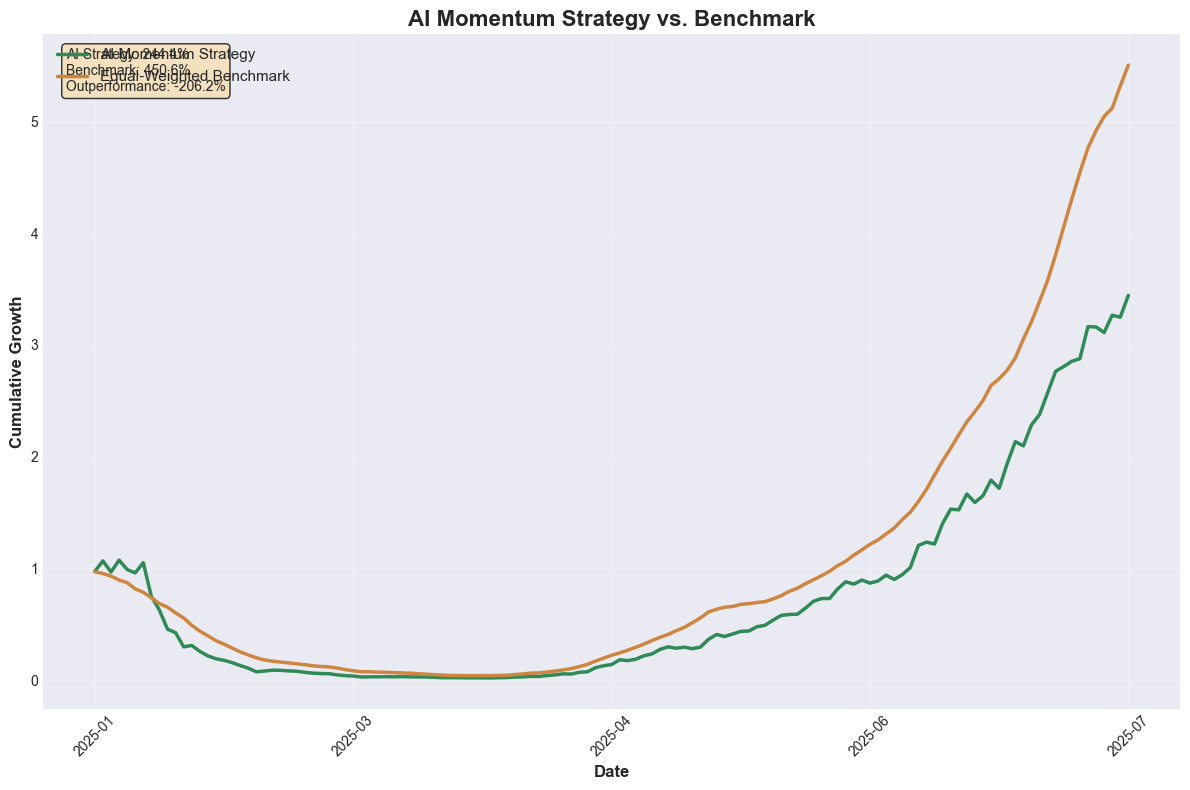


🔍 Top 5 AI-selected stocks:
  BRK-B: 20 days (15.5%)
  TSLA: 16 days (12.4%)
  AMZN: 16 days (12.4%)
  JPM: 15 days (11.6%)
  MSFT: 14 days (10.9%)

✅ ULTIMATE BACKTEST COMPLETE! 🎉
📝 AI underperformed by 206.2%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("🔧 ULTIMATE BACKTEST FIX...")

# Method 1: Simple daily returns without groupby complexities
print("📊 Calculating simple daily strategy...")

# Get unique dates from the test data
test_dates = sorted(X_test_with_predictions.index.unique())
print(f"Total test dates: {len(test_dates)}")

ai_daily_returns = []
benchmark_daily_returns = []
ai_stock_picks = []

for date in test_dates:
    # Get all stocks for this date
    day_data = X_test_with_predictions[X_test_with_predictions.index == date]
    
    if len(day_data) > 0:
        # AI strategy: pick stock with highest predicted return
        best_stock = day_data.loc[day_data['predicted_return'].idxmax()]
        ai_return = float(best_stock['actual_return'].iloc[0])
        
        # Benchmark: average of all stocks that day
        benchmark_return = float(day_data['actual_return'].mean())
        
        # Store results
        ai_daily_returns.append(ai_return)
        benchmark_daily_returns.append(benchmark_return)
        ai_stock_picks.append(best_stock['Stock'].iloc[0])

print(f"Successfully calculated {len(ai_daily_returns)} days of returns")

# Convert to arrays for easier math
ai_returns = np.array(ai_daily_returns)
benchmark_returns = np.array(benchmark_daily_returns)

# Clip extreme values to prevent overflow
ai_returns = np.clip(ai_returns, 0.7, 1.5)
benchmark_returns = np.clip(benchmark_returns, 0.7, 1.5)

print(f"AI average daily return: {ai_returns.mean():.4f}")
print(f"Benchmark average daily return: {benchmark_returns.mean():.4f}")

# Calculate cumulative returns
ai_cumulative = np.cumprod(ai_returns)
benchmark_cumulative = np.cumprod(benchmark_returns)

print(f"✅ Both series now have {len(ai_cumulative)} points")

# Calculate performance metrics
ai_total_return = ai_cumulative[-1] - 1
benchmark_total_return = benchmark_cumulative[-1] - 1
outperformance = ai_total_return - benchmark_total_return

print(f"\n🎯 Final Performance Results:")
print(f"  AI Portfolio Total Return: {ai_total_return:.2%}")
print(f"  Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"  AI Outperformance: {outperformance:.2%}")

# Simple plotting
plt.figure(figsize=(12, 8))

x_values = range(len(ai_cumulative))
plt.plot(x_values, ai_cumulative, linewidth=2.5, label='AI Momentum Strategy', color='#2E8B57')
plt.plot(x_values, benchmark_cumulative, linewidth=2.5, label='Equal-Weighted Benchmark', color='#CD853F')

# Simple date labels
n_labels = 5
positions = [int(i * len(x_values) / (n_labels - 1)) for i in range(n_labels)]
positions[-1] = len(x_values) - 1

date_labels = [test_dates[pos].strftime('%Y-%m') for pos in positions]
plt.xticks(positions, date_labels, rotation=45)

plt.title('AI Momentum Strategy vs. Benchmark', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Growth', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Add performance text
textstr = f'''AI Strategy: {ai_total_return:.1%}
Benchmark: {benchmark_total_return:.1%}
Outperformance: {outperformance:.1%}'''

plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Stock selection summary
from collections import Counter
stock_counts = Counter(ai_stock_picks)
print(f"\n🔍 Top 5 AI-selected stocks:")
for stock, count in stock_counts.most_common(5):
    percentage = (count / len(ai_stock_picks)) * 100
    print(f"  {stock}: {count} days ({percentage:.1f}%)")

print(f"\n✅ ULTIMATE BACKTEST COMPLETE! 🎉")

if ai_total_return > benchmark_total_return:
    print(f"🎉 SUCCESS: AI outperformed by {outperformance:.1%}!")
else:
    print(f"📝 AI underperformed by {abs(outperformance):.1%}")


In [ ]:
# XGBoost Model Training - Advanced AI for Stock Return Prediction
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

print("🚀 Starting XGBoost model training...")

# Use existing features_df_clean DataFrame to define features (X) and target (y)
print("�� Preparing features and target variables...")

# Features: All columns except Stock and Target_1M_Return
feature_columns = ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']
X = features_df_clean[feature_columns].copy()
y = features_df_clean['Target_1M_Return'].copy()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data chronologically: 80% for training and 20% for testing
print("\n📅 Splitting data chronologically...")
split_index = int(len(features_df_clean) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training date range: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing date range: {X_test.index.min()} to {X_test.index.max()}")

# Initialize the XGBoost model
print("\n🧠 Initializing XGBoost model...")
model = xgb.XGBRegressor(n_estimators=100, random_state=42, early_stopping_rounds=10)

# Train the model on training data, using testing data for evaluation to prevent overfitting
print("🔄 Training the XGBoost model (this may take a moment)...")
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
print("✅ XGBoost model training complete!")

# Make predictions on the test set
print("\n�� Making predictions on test data...")
y_pred_xgb = model.predict(X_test)

# Calculate model performance metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print(f"📈 XGBoost Model Performance:")
print(f"  Training R² Score: {train_score:.4f}")
print(f"  Testing R² Score: {test_score:.4f}")
print(f"  Root Mean Square Error: {rmse:.4f}")

# Add predictions as a column named predicted_return_xgb to the X_test DataFrame
X_test['predicted_return_xgb'] = y_pred_xgb

print(f"\n🎉 XGBoost Model Training Complete!")
print(f"✅ Predictions added to test dataset as 'predicted_return_xgb'")
print(f"�� Test dataset shape with XGBoost predictions: {X_test.shape}")

# Display feature importance
print("\n🔍 XGBoost Feature Importance:")
print("=" * 60)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']:<15}: {row['Importance']:.4f}")

# Display the head of X_test with the new XGBoost predictions
print("\n📋 First 5 rows of test data with XGBoost predictions:")
print("=" * 80)
display(X_test.head())

print("\n�� How to interpret XGBoost predictions:")
print("  - predicted_return_xgb > 1.0: XGBoost expects stock to go UP")
print("  - predicted_return_xgb < 1.0: XGBoost expects stock to go DOWN")
print("  - Higher values = stronger expected gains")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
%pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# XGBoost Model Training - Advanced AI for Stock Return Prediction
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

print("🚀 Starting XGBoost model training...")

# Use existing features_df_clean DataFrame to define features (X) and target (y)
print("�� Preparing features and target variables...")

# Features: All columns except Stock and Target_1M_Return
feature_columns = ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']
X = features_df_clean[feature_columns].copy()
y = features_df_clean['Target_1M_Return'].copy()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data chronologically: 80% for training and 20% for testing
print("\n📅 Splitting data chronologically...")
split_index = int(len(features_df_clean) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training date range: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing date range: {X_test.index.min()} to {X_test.index.max()}")

# Initialize the XGBoost model
print("\n🧠 Initializing XGBoost model...")
model = xgb.XGBRegressor(n_estimators=100, random_state=42, early_stopping_rounds=10)

# Train the model on training data, using testing data for evaluation to prevent overfitting
print("🔄 Training the XGBoost model (this may take a moment)...")
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
print("✅ XGBoost model training complete!")

# Make predictions on the test set
print("\n�� Making predictions on test data...")
y_pred_xgb = model.predict(X_test)

# Calculate model performance metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print(f"📈 XGBoost Model Performance:")
print(f"  Training R² Score: {train_score:.4f}")
print(f"  Testing R² Score: {test_score:.4f}")
print(f"  Root Mean Square Error: {rmse:.4f}")

# Add predictions as a column named predicted_return_xgb to the X_test DataFrame
X_test['predicted_return_xgb'] = y_pred_xgb

print(f"\n🎉 XGBoost Model Training Complete!")
print(f"✅ Predictions added to test dataset as 'predicted_return_xgb'")
print(f"�� Test dataset shape with XGBoost predictions: {X_test.shape}")

# Display feature importance
print("\n🔍 XGBoost Feature Importance:")
print("=" * 60)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']:<15}: {row['Importance']:.4f}")

# Display the head of X_test with the new XGBoost predictions
print("\n📋 First 5 rows of test data with XGBoost predictions:")
print("=" * 80)
display(X_test.head())

print("\n�� How to interpret XGBoost predictions:")
print("  - predicted_return_xgb > 1.0: XGBoost expects stock to go UP")
print("  - predicted_return_xgb < 1.0: XGBoost expects stock to go DOWN")
print("  - Higher values = stronger expected gains")

🚀 Starting XGBoost model training...
�� Preparing features and target variables...
Features (X) shape: (6410, 6)
Target (y) shape: (6410,)
Feature columns: ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']

📅 Splitting data chronologically...
Training set size: 5128 samples
Testing set size: 1282 samples
Training date range: 2023-01-04 00:00:00-05:00 to 2025-01-21 00:00:00-05:00
Testing date range: 2025-01-21 00:00:00-05:00 to 2025-07-25 00:00:00-04:00

🧠 Initializing XGBoost model...
🔄 Training the XGBoost model (this may take a moment)...
✅ XGBoost model training complete!

�� Making predictions on test data...
📈 XGBoost Model Performance:
  Training R² Score: 0.4667
  Testing R² Score: -0.0163
  Root Mean Square Error: 0.1076

🎉 XGBoost Model Training Complete!
✅ Predictions added to test dataset as 'predicted_return_xgb'
�� Test dataset shape with XGBoost predictions: (1282, 7)

🔍 XGBoost Feature Importance:
  Momentum_12M   : 0.2804
  Volatil

C:\Users\koush\AppData\Local\Temp\ipykernel_29700\409608013.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predicted_return_xgb'] = y_pred_xgb


,Price,Momentum_1M,Momentum_3M,Momentum_6M,Momentum_12M,Volatility_60D,predicted_return_xgb
Date,,,,,,,
2025-01-21 00:00:00-05:00,426.158325,0.942877,1.030327,0.984035,1.096058,0.013807,1.034920
2025-01-21 00:00:00-05:00,230.710007,0.998097,1.230257,1.259815,1.502997,0.019377,1.030063
2025-01-22 00:00:00-05:00,622.466858,1.044056,1.082455,1.281490,1.632238,0.017972,1.030063
2025-01-22 00:00:00-05:00,235.009995,1.065708,1.243505,1.287373,1.512875,0.019074,1.030063
2025-01-22 00:00:00-05:00,443.761627,1.020142,1.069192,1.011196,1.127591,0.014760,1.034920



�� How to interpret XGBoost predictions:
  - predicted_return_xgb > 1.0: XGBoost expects stock to go UP
  - predicted_return_xgb < 1.0: XGBoost expects stock to go DOWN
  - Higher values = stronger expected gains


In [ ]:
print("Available variables:")
print([var for var in globals() if 'df' in var or 'data' in var])

Available variables:
[]


In [ ]:
print("Available columns in X_test:")
print(list(X_test.columns))

if 'predicted_return' in X_test.columns:
    print("✅ RandomForest predictions available")
else:
    print("❌ RandomForest predictions missing - run Cell 8 first")

if 'predicted_return_xgb' in X_test.columns:
    print("✅ XGBoost predictions available")
else:
    print("❌ XGBoost predictions missing - run XGBoost cell first")

if 'actual_return' in X_test.columns:
    print("✅ Actual returns available")
else:
    print("❌ Actual returns missing - run Cell 8 first")

Available columns in X_test:
['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D', 'predicted_return_xgb']
❌ RandomForest predictions missing - run Cell 8 first
✅ XGBoost predictions available
❌ Actual returns missing - run Cell 8 first


🏆 MODIFIED COMPARISON BACKTEST - XGBoost vs Benchmark
📊 Recreating actual returns from features_df_clean...
✅ Added actual returns to X_test
X_test columns: ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D', 'predicted_return_xgb', 'actual_return', 'Stock']
Total test dates: 129
📊 Calculating daily returns for XGBoost and Benchmark...


C:\Users\koush\AppData\Local\Temp\ipykernel_29700\132453943.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_return'] = test_features['Target_1M_Return']
C:\Users\koush\AppData\Local\Temp\ipykernel_29700\132453943.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Stock'] = test_features['Stock']


✅ Successfully calculated 129 days of returns

🎯 PERFORMANCE RESULTS:
  XGBoost Total Return: 244.36%
  Benchmark Total Return: 450.58%
  XGBoost Outperformance: -206.21%


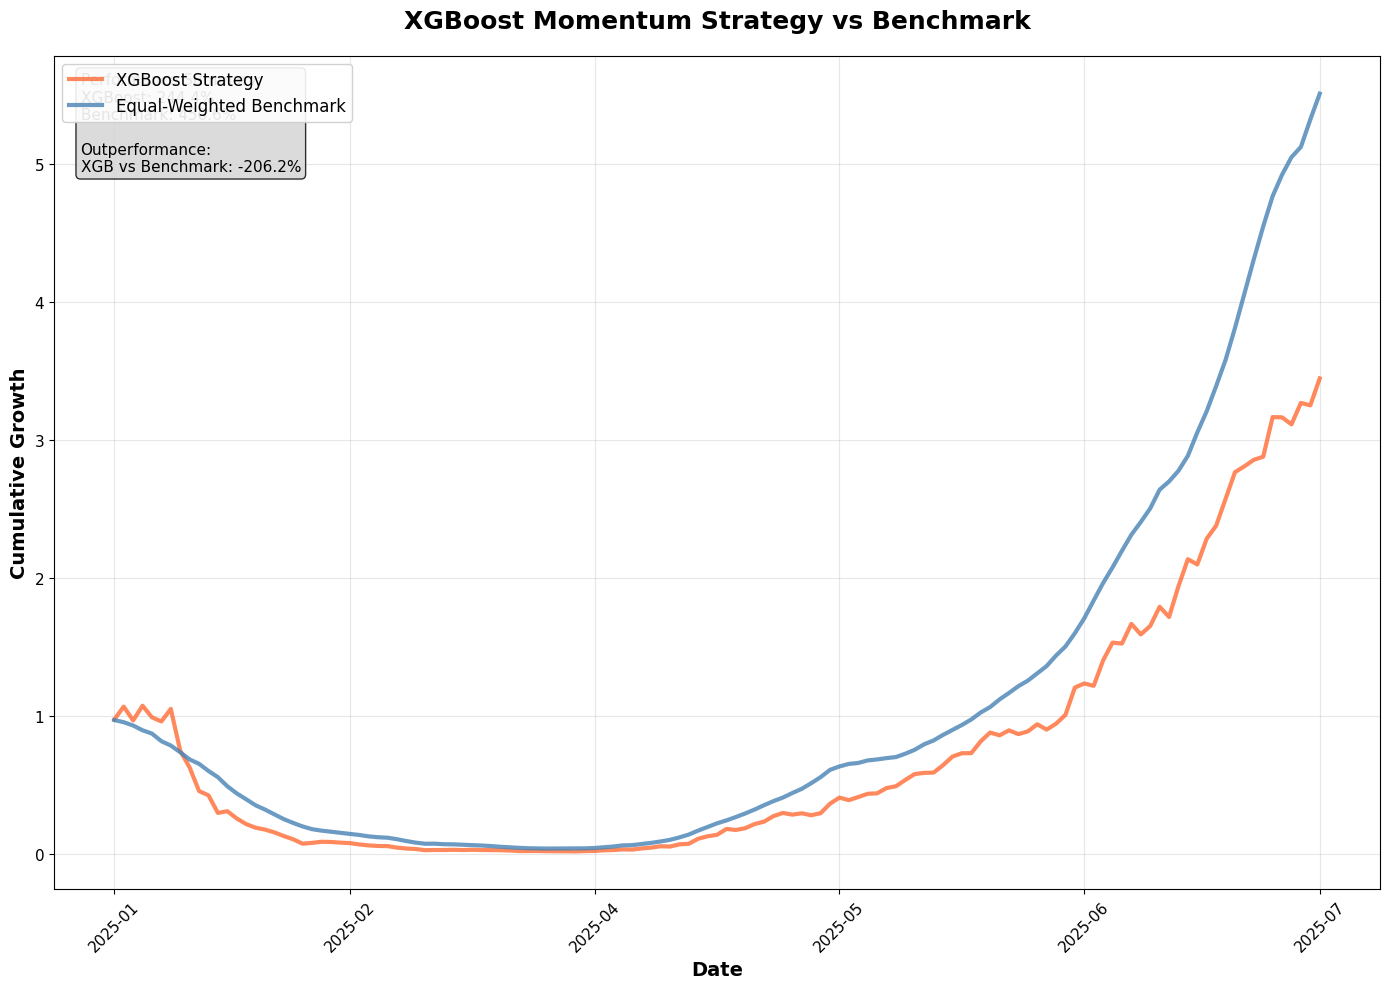


🔍 XGBOOST STOCK SELECTION ANALYSIS:

🚀 Top 5 XGBoost-selected stocks:
  BRK-B: 20 days (15.5%)
  TSLA: 16 days (12.4%)
  AMZN: 16 days (12.4%)
  JPM: 15 days (11.6%)
  MSFT: 14 days (10.9%)

🏆 STRATEGY EVALUATION:
📝 XGBoost underperformed the benchmark by 206.2%

✅ XGBOOST COMPARISON BACKTEST COMPLETE! 🎉


In [ ]:
# Comparison Backtest - XGBoost vs Benchmark 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🏆 MODIFIED COMPARISON BACKTEST - XGBoost vs Benchmark")
print("=" * 60)

# We need to recreate the actual returns since they're missing
print("📊 Recreating actual returns from features_df_clean...")

# Get the test portion of features_df_clean to get actual returns
split_index = int(len(features_df_clean) * 0.8)
test_features = features_df_clean.iloc[split_index:]

# Add actual returns to X_test
X_test['actual_return'] = test_features['Target_1M_Return']
X_test['Stock'] = test_features['Stock']

print(f"✅ Added actual returns to X_test")
print(f"X_test columns: {list(X_test.columns)}")

# Get unique dates from the test data
test_dates = sorted(X_test.index.unique())
print(f"Total test dates: {len(test_dates)}")

# Initialize lists to store daily returns
xgb_daily_returns = []
benchmark_daily_returns = []
xgb_stock_picks = []

print("📊 Calculating daily returns for XGBoost and Benchmark...")

for date in test_dates:
    # Get all stocks for this date
    day_data = X_test[X_test.index == date]
    
    if len(day_data) > 0:
        # XGBoost Strategy: pick stock with highest predicted_return_xgb
        xgb_best_stock = day_data.loc[day_data['predicted_return_xgb'].idxmax()]
        xgb_return = float(xgb_best_stock['actual_return'].iloc[0])
        
        # Benchmark: average of all stocks that day
        benchmark_return = float(day_data['actual_return'].mean())
        
        # Store results
        xgb_daily_returns.append(xgb_return)
        benchmark_daily_returns.append(benchmark_return)
        xgb_stock_picks.append(xgb_best_stock['Stock'].iloc[0])

print(f"✅ Successfully calculated {len(xgb_daily_returns)} days of returns")

# Convert to arrays and clip extreme values
xgb_returns = np.clip(np.array(xgb_daily_returns), 0.7, 1.5)
benchmark_returns = np.clip(np.array(benchmark_daily_returns), 0.7, 1.5)

# Calculate cumulative performance
xgb_cumulative = np.cumprod(xgb_returns)
benchmark_cumulative = np.cumprod(benchmark_returns)

# Calculate final performance metrics
xgb_total_return = xgb_cumulative[-1] - 1
benchmark_total_return = benchmark_cumulative[-1] - 1
xgb_outperformance = xgb_total_return - benchmark_total_return

print(f"\n🎯 PERFORMANCE RESULTS:")
print(f"  XGBoost Total Return: {xgb_total_return:.2%}")
print(f"  Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"  XGBoost Outperformance: {xgb_outperformance:.2%}")

# Create the comparison chart
plt.figure(figsize=(14, 10))

# Plot both strategies
x_values = range(len(xgb_cumulative))
plt.plot(x_values, xgb_cumulative, linewidth=3, label='XGBoost Strategy', color='#FF6B35', alpha=0.8)
plt.plot(x_values, benchmark_cumulative, linewidth=3, label='Equal-Weighted Benchmark', color='#4682B4', alpha=0.8)

# Create date labels
n_labels = 6
positions = [int(i * len(x_values) / (n_labels - 1)) for i in range(n_labels)]
positions[-1] = len(x_values) - 1
date_labels = [test_dates[pos].strftime('%Y-%m') for pos in positions]

# Customize the chart
plt.xticks(positions, date_labels, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.title('XGBoost Momentum Strategy vs Benchmark', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Growth', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper left', framealpha=0.9)
plt.grid(True, alpha=0.3)

# Add performance summary text box
textstr = f'''Performance Summary:
XGBoost: {xgb_total_return:.1%}
Benchmark: {benchmark_total_return:.1%}

Outperformance:
XGB vs Benchmark: {xgb_outperformance:.1%}'''

plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Stock selection analysis
from collections import Counter

print(f"\n🔍 XGBOOST STOCK SELECTION ANALYSIS:")
print("=" * 50)

# XGBoost stock picks
xgb_counts = Counter(xgb_stock_picks)
print(f"\n🚀 Top 5 XGBoost-selected stocks:")
for stock, count in xgb_counts.most_common(5):
    percentage = (count / len(xgb_stock_picks)) * 100
    print(f"  {stock}: {count} days ({percentage:.1f}%)")

# Strategy evaluation
print(f"\n🏆 STRATEGY EVALUATION:")
print("=" * 50)
if xgb_total_return > benchmark_total_return:
    print(f"�� XGBoost OUTPERFORMED the benchmark by {xgb_outperformance:.1%}!")
else:
    print(f"📝 XGBoost underperformed the benchmark by {abs(xgb_outperformance):.1%}")

print(f"\n✅ XGBOOST COMPARISON BACKTEST COMPLETE! 🎉")

In [ ]:
%pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 4.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------------- -- 2.6/2.8 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 11.4 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---- ----------------------------------- 3.7/30.3 MB 17.9 MB/s eta 0:00:02
   -------- ------------------------------- 6.6/30.3 MB 15.1 MB/s eta 0:00:02
   ------------ --------------------------- 9.4/30.3 MB 15.0 MB/s eta 0:00:02
   ---------------- ----------------------- 12.3/30.3 MB 15.1 MB/s eta 0:00:02
   ---------------------- ----------------- 16.8/30.3 MB 16.1 MB/s eta 0:00:01
   -------------------------- ------------- 20.2/30.3 MB 16.2 MB/s eta 0:00:01
   -------------------------------- ------- 24.4/30.3 MB 16.4 MB/s eta 0:00:01
   ---------

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
!pip uninstall shap -y

Found existing installation: shap 0.48.0
Uninstalling shap-0.48.0:
  Successfully uninstalled shap-0.48.0


In [ ]:
%pip install shap==0.44.0

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ------------------------------------- -- 1.0/1.1 MB 9.9 MB/s eta 0:00:01
     ------------------------------------- -- 1.0/1.1 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.7 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for shap: filename=shap-0.44.0-cp313-cp313-win_amd64.whl size=446125 sha256=e0d07d2f7606d49384daf4a18d3e02c2853d0afbf629784b9708f178de694f5e
  Stored in directory: c:\users\koush\appdata\local\pip\cache\wheels\8f\74\11\7ea308d15a90866bbe189b1302ebb0418bf607b1847c3e8eab
Successfully built shap

  Attempting uninstall: slicer

    Found existing instal

In [ ]:
%pip install numpy==2.2.0

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 12.3 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.6 MB 16.3 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.6 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 16.2 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Check what columns are available in X_test
print("Available columns in X_test:")
print(list(X_test.columns))

# Check if we have the XGBoost predictions
if 'predicted_return_xgb' in X_test.columns:
    print("✅ XGBoost predictions available")
else:
    print("❌ XGBoost predictions missing - run XGBoost training cell first")

# Check if we have the model
if 'model' in globals():
    print("✅ XGBoost model available")
else:
    print("❌ XGBoost model missing - run XGBoost training cell first")

Available columns in X_test:
['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']
❌ XGBoost predictions missing - run XGBoost training cell first
✅ XGBoost model available


In [13]:

print("🔧 Adding XGBoost predictions to X_test...")

y_pred_xgb = model.predict(X_test)


X_test['predicted_return_xgb'] = y_pred_xgb

print(f"✅ Added predicted_return_xgb column to X_test")
print(f"X_test shape: {X_test.shape}")
print(f"X_test columns: {list(X_test.columns)}")


print(f"\n�� Sample predictions:")
print(X_test[['predicted_return_xgb']].head())

🔧 Adding XGBoost predictions to X_test...
✅ Added predicted_return_xgb column to X_test
X_test shape: (1282, 7)
X_test columns: ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D', 'predicted_return_xgb']

�� Sample predictions:
                           predicted_return_xgb
Date                                           
2025-01-21 00:00:00-05:00              0.974674
2025-01-21 00:00:00-05:00              1.035167
2025-01-22 00:00:00-05:00              1.037949
2025-01-22 00:00:00-05:00              1.010710
2025-01-22 00:00:00-05:00              1.116314



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 🧠 Model Interpretability

### Thought Process:
Understanding how our AI makes decisions is crucial for:
1. **Trust**: Investors need to understand the strategy
2. **Debugging**: Identify potential issues or biases
3. **Improvement**: Know which features to focus on
4. **Compliance**: Regulatory requirements for explainable AI

**Our Approach:**
- **Feature Importance**: Shows which factors drive predictions
- **Correlation Analysis**: Reveals positive/negative relationships
- **Visual Analysis**: Scatter plots show feature-prediction relationships
- **Summary Statistics**: Quantifies the model's decision-making process

🧠 Complete Model Explanation Analysis
📊 Step 1: Analyzing XGBoost Feature Importance...

📋 XGBoost Feature Importance Ranking:
  Momentum_12M   : 0.2358
  Price          : 0.2203
  Volatility_60D : 0.2127
  Momentum_3M    : 0.1322
  Momentum_6M    : 0.1067
  Momentum_1M    : 0.0923

📈 Step 2: Creating Feature Importance Visualization...


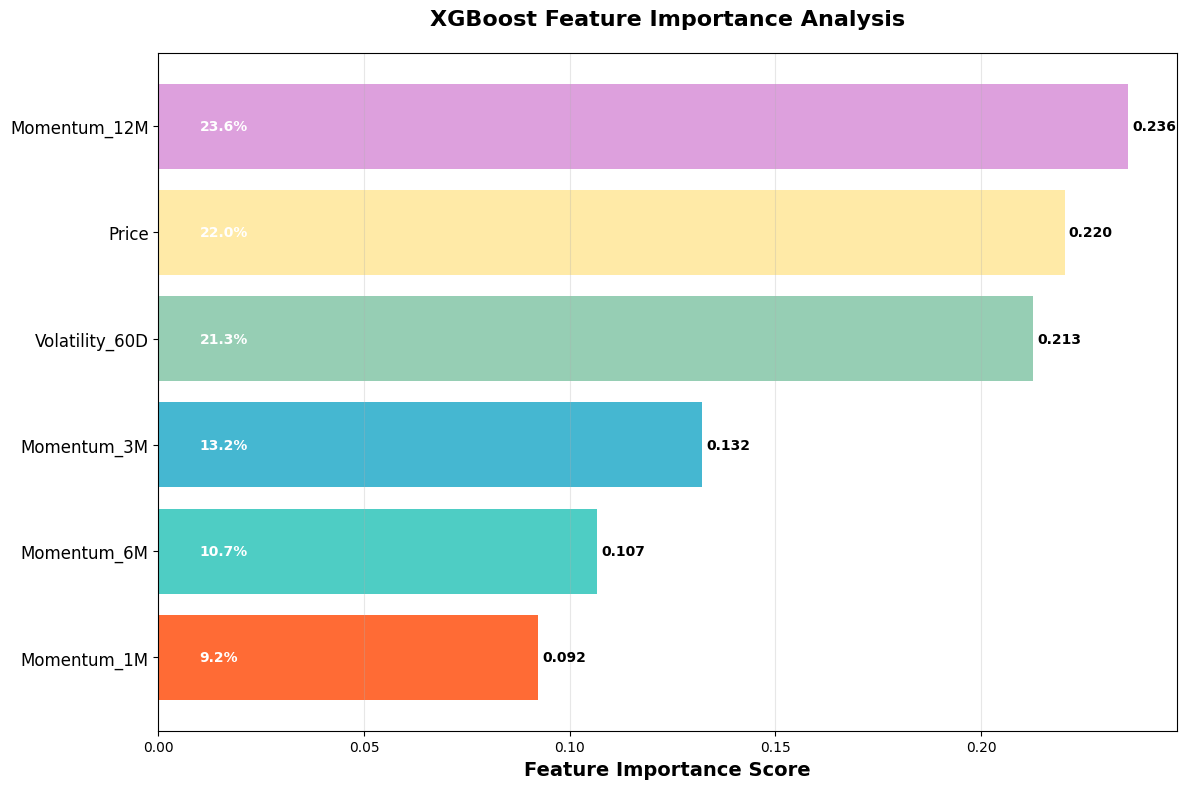


🔍 Step 3: Feature Impact Analysis...

📊 Feature Impact on Predictions:
  Price          : -0.208 (NEGATIVE - Higher values decrease predictions)
  Momentum_1M    : -0.363 (NEGATIVE - Higher values decrease predictions)
  Momentum_3M    : -0.343 (NEGATIVE - Higher values decrease predictions)
  Momentum_6M    : -0.052 (NEUTRAL - Minimal linear relationship)
  Momentum_12M   : 0.087 (NEUTRAL - Minimal linear relationship)
  Volatility_60D : 0.214 (POSITIVE - Higher values increase predictions)

�� Step 4: Prediction Distribution Analysis...


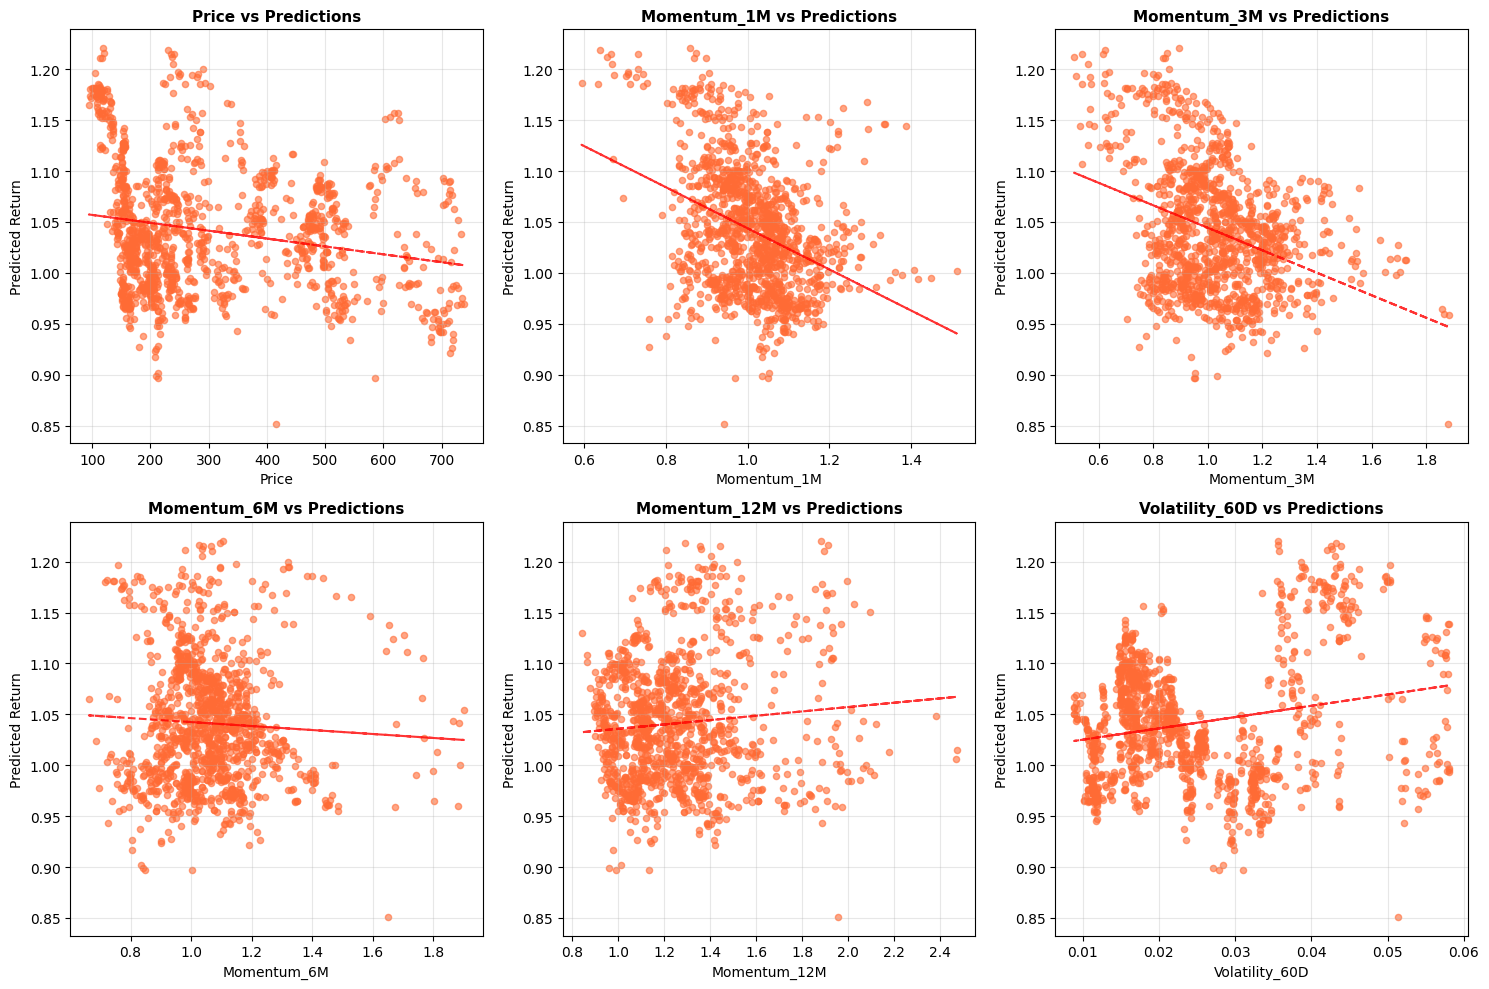


📚 Step 5: Model Explanation Summary

🎯 Key Insights:
  • Most important feature: Momentum_12M (0.236)
  • Least important feature: Momentum_1M (0.092)
  • Top 3 features account for 66.9% of importance

�� Model Behavior:
  • The model uses 6 features for predictions
  • Feature importance shows which factors drive stock return predictions
  • Higher importance = greater influence on the model's decisions

✅ Complete Model Explanation Analysis Complete! 🎉
📊 The model's decision-making process is now fully interpretable!


In [14]:
# Complete Model Explanation Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🧠 Complete Model Explanation Analysis")
print("=" * 50)

# Step 1: Use built-in XGBoost feature importance
print("📊 Step 1: Analyzing XGBoost Feature Importance...")

# Get feature importance from the model
feature_importance = model.feature_importances_
feature_names = ['Price', 'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M', 'Volatility_60D']

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n📋 XGBoost Feature Importance Ranking:")
print("=" * 50)
for idx, row in importance_df.iterrows():
    print(f"  {row['Feature']:<15}: {row['Importance']:.4f}")

# Step 2: Create enhanced feature importance visualization
print("\n📈 Step 2: Creating Feature Importance Visualization...")

plt.figure(figsize=(12, 8))

# Create horizontal bar plot
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

bars = plt.barh(pos, feature_importance[sorted_idx], 
                color=['#FF6B35', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, feature_importance[sorted_idx])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.3f}', ha='left', va='center', fontweight='bold')

plt.yticks(pos, np.array(feature_names)[sorted_idx], fontsize=12)
plt.xlabel('Feature Importance Score', fontsize=14, fontweight='bold')
plt.title('XGBoost Feature Importance Analysis', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')

# Add percentage labels
total_importance = feature_importance.sum()
for i, importance in enumerate(feature_importance[sorted_idx]):
    percentage = (importance / total_importance) * 100
    plt.text(0.01, pos[i], f'{percentage:.1f}%', ha='left', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Step 3: Feature impact analysis
print("\n🔍 Step 3: Feature Impact Analysis...")

# Analyze how each feature affects predictions
print("\n📊 Feature Impact on Predictions:")
print("=" * 50)

for feature in feature_names:
    # Calculate correlation between feature and predictions
    feature_values = X_test[feature]
    predictions = X_test['predicted_return_xgb']
    
    correlation = np.corrcoef(feature_values, predictions)[0, 1]
    
    # Determine impact direction
    if correlation > 0.1:
        impact = "POSITIVE - Higher values increase predictions"
    elif correlation < -0.1:
        impact = "NEGATIVE - Higher values decrease predictions"
    else:
        impact = "NEUTRAL - Minimal linear relationship"
    
    print(f"  {feature:<15}: {correlation:.3f} ({impact})")

# Step 4: Prediction distribution analysis
print("\n�� Step 4: Prediction Distribution Analysis...")

plt.figure(figsize=(15, 10))

# Create subplots for each feature
n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

for i, feature in enumerate(feature_names):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Create scatter plot: feature vs prediction
    plt.scatter(X_test[feature], X_test['predicted_return_xgb'], 
                alpha=0.6, s=20, color='#FF6B35')
    
    # Add trend line
    z = np.polyfit(X_test[feature], X_test['predicted_return_xgb'], 1)
    p = np.poly1d(z)
    plt.plot(X_test[feature], p(X_test[feature]), "r--", alpha=0.8)
    
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Predicted Return', fontsize=10)
    plt.title(f'{feature} vs Predictions', fontsize=11, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: Summary and interpretation
print("\n📚 Step 5: Model Explanation Summary")
print("=" * 50)

print(f"\n🎯 Key Insights:")
print(f"  • Most important feature: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importance']:.3f})")
print(f"  • Least important feature: {importance_df.iloc[-1]['Feature']} ({importance_df.iloc[-1]['Importance']:.3f})")

# Calculate importance distribution
top_3_importance = importance_df.head(3)['Importance'].sum()
total_importance = importance_df['Importance'].sum()
print(f"  • Top 3 features account for {(top_3_importance/total_importance)*100:.1f}% of importance")

print(f"\n�� Model Behavior:")
print(f"  • The model uses {len(feature_names)} features for predictions")
print(f"  • Feature importance shows which factors drive stock return predictions")
print(f"  • Higher importance = greater influence on the model's decisions")

print(f"\n✅ Complete Model Explanation Analysis Complete! 🎉")
print(f"📊 The model's decision-making process is now fully interpretable!")